<a href="https://colab.research.google.com/github/manikanta70137/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection%5BXGBoost%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb


Class
0    284315
1       492
Name: count, dtype: int64
Normal share = 99.83
Fraud share = 0.17


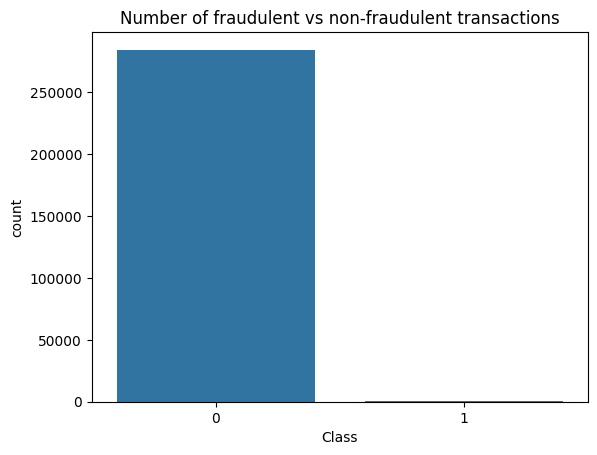

In [33]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# Check class distribution
classes = df['Class'].value_counts()
print(classes)

# Calculate percentage shares of normal and fraud transactions
normal_share = round((classes[0] / df['Class'].count() * 100), 2)
fraud_share = round((classes[1] / df['Class'].count() * 100), 2)
print("Normal share =", normal_share)
print("Fraud share =", fraud_share)

# Plot class distribution
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transactions')
plt.show()

In [34]:
# Define features (X) and target (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


In [35]:
scaler = StandardScaler()
# Fit on training data and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
# Transform test data
X_test['Amount'] = scaler.transform(X_test[['Amount']])


In [36]:
# Apply power transformation to reduce skewness
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)


In [37]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print('Before sampling:', Counter(y_train))
print('After sampling:', Counter(y_train_ros))


Before sampling: Counter({0: 227449, 1: 396})
After sampling: Counter({0: 227449, 1: 227449})


In [38]:
# Define and train XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb_model.fit(X_train_ros, y_train_ros)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [39]:
from sklearn.metrics import accuracy_score

# Predict on test set and evaluate
y_pred_test_xgb = xgb_model.predict(X_test)

# Calculate test accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
print("Test Accuracy (XGBoost):", accuracy_xgb)

# Confusion Matrix and Classification Report
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test_xgb)
class_report_xgb = classification_report(y_test, y_pred_test_xgb)

print("Confusion Matrix (XGBoost):\n", conf_matrix_xgb)
print("Classification Report (XGBoost):\n", class_report_xgb)

Test Accuracy (XGBoost): 0.9994557775359011
Confusion Matrix (XGBoost):
 [[56856    10]
 [   21    75]]
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.78      0.83        96

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

